In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from westgate.flaml_model import *
import pandas as pd
from westgate.combochart import combo_chart

In [3]:
data_folder = 'C:/Users/karim/Documents/westgate/data/training/'

In [4]:
accepted_2022_df = pd.read_csv(data_folder + 'loan_outcomes_2022.csv', encoding='latin')
refused_2022_df = pd.read_csv(data_folder + 'refusal2022.csv', encoding='latin')


C:\Users\karim\AppData\Local\Temp\ipykernel_38728\2059859133.py:1: DtypeWarning: Columns (741) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_2022_df = pd.read_csv(data_folder + 'loan_outcomes_2022.csv', encoding='latin')


In [5]:
refused_2022_df['request_date'].isna().sum()

0

In [6]:
accepted_2022_df.head()

,Id,account_age_days,active_days_trend,auto_loan_payment_frequency,average_closing_balance_day_after_employer_income,average_closing_balance_day_after_government_income,average_closing_balance_day_after_income,average_closing_balance_day_of_employer_income,average_closing_balance_day_of_government_income,average_closing_balance_day_of_income,...,principal,request_date,total_paid,fees_paid,first_repayment_date,last_repayment_date,repayment_count,loan_application_id,borrower_id,error
0,fe5152b3-de9b-43ad-952e-9d8256fa4dbf,411.0,1.13,NONE_DETECTED,2255.66,1953.4,2223.04,2285.82,1653.16,878.06,...,400,2022-01-03 0:00,799.56,0.0,2022-01-21 0:00,2022-04-29 0:00,8.0,IF1000001770,CID000001770,NaN
1,cca4af83-7da9-4bf1-896b-18f1e7e79cd6,91.0,0.81,NONE_DETECTED,1773.62,1544.31,1406.45,2877.36,1955,539.54,...,300,2022-01-03 0:00,0.00,NaN,NaN,NaN,NaN,IF1000001985,CID000001985,NaN
2,aaf584ec-b257-4d75-8fb6-21c542950515,91.0,0.91,NONE_DETECTED,1391.54,734.61,1297.69,2412.04,791.78,1096.63,...,300,2022-01-03 0:00,587.58,0.0,2022-01-19 0:00,2022-03-30 0:00,6.0,IF1000001938,CID000001938,NaN
3,7188c8d3-7ded-459a-9c6e-313f4938c3b5,91.0,1.01,NONE_DETECTED,324.16,1461.1,459.23,76.91,1732.94,226.30,...,400,2022-01-03 0:00,799.56,0.0,2022-01-13 0:00,2022-04-21 0:00,8.0,IF1000001987,CID000001987,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300,2022-01-04 0:00,189.86,0.0,2022-01-13 0:00,2022-02-10 0:00,2.0,IF1000002247,CID000002247,NoTransactions


In [7]:
refused_2022_df['Id'] = refused_2022_df['loginId']

In [8]:
refused_2022_df.head()

,approbexRequest,loginId,request_date,status,dob,gender,province,refusalReason,account_age_days,active_days_trend,...,student_loan_payments_frequency,telecom_payments_frequency,telecom_payments_average,other_loan_payments_frequency,other_loan_payments_average,utility_payments_frequency,utility_payments_average,average_monthly_insurance_income_complex,MostRecentTransactionDate,Id
0,33618,407e7544-e992-4511-d395-08da1bcb0581,2022-04-11,Refused,1976-07-24,female,Ontario,Non eligible income;Too many NSF's.;Excessive ...,91,1.05,...,NONE_DETECTED,NONE_DETECTED,0.00,NONE_DETECTED,0.00,NONE_DETECTED,0.0,0.0,04/08/2022,407e7544-e992-4511-d395-08da1bcb0581
1,33515,429ff74e-b4d0-4275-d359-08da1bcb0581,2022-04-11,Refused,1987-05-15,male,Ontario,Other (when other the agent will have to manua...,91,1.14,...,NONE_DETECTED,NONE_DETECTED,0.00,Monthly,452.96,NONE_DETECTED,0.0,0.0,04/08/2022,429ff74e-b4d0-4275-d359-08da1bcb0581
2,33449,3d551bdd-f6fd-47f5-a0e9-08da19aabda4,2022-04-11,Refused,1994-04-09,female,Ontario,Other (when other the agent will have to manua...,91,0.94,...,NONE_DETECTED,Unknown,517.22,Unknown,90.82,Unknown,450.0,0.0,04/11/2022,3d551bdd-f6fd-47f5-a0e9-08da19aabda4
3,33358,42f8d3c8-c233-401a-a0b2-08da19aabda4,2022-04-11,Refused,1987-04-04,male,Quebec,Other (when other the agent will have to manua...,91,0.83,...,NONE_DETECTED,NONE_DETECTED,0.00,NONE_DETECTED,0.00,NONE_DETECTED,0.0,0.0,04/09/2022,42f8d3c8-c233-401a-a0b2-08da19aabda4
4,77410,b8c33e44-9022-4949-8de2-08da74b319c4,2022-08-02,Refused,1993-08-02,female,New Brunswick,Non eligible income,91,0.98,...,NONE_DETECTED,Unknown,169.10,Unknown,66.33,NONE_DETECTED,0.0,0.0,08/02/2022,b8c33e44-9022-4949-8de2-08da74b319c4


In [9]:
accepted_2023_df = pd.read_csv(data_folder + 'janToNov2023LoansAccepted.csv')
refused_2023_df = pd.read_csv(data_folder + 'refusal2023_IF.csv')

C:\Users\karim\AppData\Local\Temp\ipykernel_38728\3334318270.py:1: DtypeWarning: Columns (394) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_2023_df = pd.read_csv(data_folder + 'janToNov2023LoansAccepted.csv')


In [10]:
accepted_2023_df.head()

,Id,dob,gender,request_date,loan_duration,loan_num_repayments,loan_total_paid,borrower_province,total_amount_due,loan_balance,...,sum_wsib_income,student_loan_payments_frequency,telecom_payments_frequency,telecom_payments_average,other_loan_payments_frequency,other_loan_payments_average,utility_payments_frequency,utility_payments_average,average_monthly_insurance_income_complex,MostRecentTransactionDate
0,3971786,1980-09-07,Male,2023-02-03,4,8,799.56,Saskatchewan,799.56,0.00,...,0.0,NONE_DETECTED,Unknown,194.01,BiWeekly,390.64,NONE_DETECTED,0.00,3344.38,12/01/2023
1,3971656,1996-06-04,Male,2023-02-03,4,14,148.41,Ontario,882.61,734.20,...,0.0,NONE_DETECTED,Unknown,16.80,Monthly,367.05,NONE_DETECTED,0.00,0.00,02/03/2023
2,3970820,1993-05-21,Male,2023-02-02,4,15,689.59,New Brunswick,689.59,0.00,...,0.0,Unknown,Unknown,205.95,BiWeekly,189.95,BiWeekly,175.25,13.86,02/02/2023
3,3971029,1990-03-04,Female,2023-02-02,3,6,97.93,Alberta,587.58,489.65,...,0.0,NONE_DETECTED,Unknown,85.25,NONE_DETECTED,0.00,Monthly,45.95,0.00,02/01/2023
4,3971679,1981-07-14,Male,2023-02-03,4,8,791.56,Quebec,791.56,0.00,...,0.0,NONE_DETECTED,Unknown,138.47,BiWeekly,55.69,Unknown,190.83,0.00,09/21/2023


In [11]:
refused_2023_df['Id'] = refused_2023_df['loginId']

In [12]:
refused_2023_df.head()

,approbexRequest,loginId,requestDate,status,dob,gender,province,refusalReason,account_age_days,active_days_trend,...,student_loan_payments_frequency,telecom_payments_frequency,telecom_payments_average,other_loan_payments_frequency,other_loan_payments_average,utility_payments_frequency,utility_payments_average,average_monthly_insurance_income_complex,MostRecentTransactionDate,Id
0,153102,bac976e4-403e-4723-60dc-08db054e1e7d,2023-02-02,Refused,2001-09-25,female,Ontario,Non eligible income,366.0,1.09,...,NONE_DETECTED,Unknown,241.17,NONE_DETECTED,0.00,NONE_DETECTED,0.00,0.0,02/02/2023,bac976e4-403e-4723-60dc-08db054e1e7d
1,153113,8ffd1e0e-532e-4306-d6cc-08db0550d16a,2023-02-02,Refused,1991-09-11,male,Alberta,Bank account under 90 Days.,16.0,0.53,...,NONE_DETECTED,NONE_DETECTED,0.00,NONE_DETECTED,0.00,NONE_DETECTED,0.00,0.0,02/02/2023,8ffd1e0e-532e-4306-d6cc-08db0550d16a
2,153115,c2660836-46f3-4737-5d64-08db05532381,2023-02-02,Refused,1984-02-23,male,Ontario,Non eligible income,366.0,1.06,...,NONE_DETECTED,Unknown,45.20,NONE_DETECTED,0.00,NONE_DETECTED,0.00,0.0,02/01/2023,c2660836-46f3-4737-5d64-08db05532381
3,153119,eb518661-42a1-4186-6a79-08daa4d33623,2023-02-02,Refused,1963-12-28,male,Alberta,Too many NSF's.; Non eligible income; Too many...,366.0,0.92,...,NONE_DETECTED,Unknown,350.40,BiWeekly,178.76,Monthly,310.43,25.4,02/02/2023,eb518661-42a1-4186-6a79-08daa4d33623
4,153120,0d8c7ae5-3ace-4193-5d65-08db05532381,2023-02-02,Refused,1992-01-07,male,Prince Edward Island,Excessive transfers,366.0,0.76,...,NONE_DETECTED,Unknown,120.39,NONE_DETECTED,0.00,NONE_DETECTED,0.00,0.0,02/02/2023,0d8c7ae5-3ace-4193-5d65-08db05532381


In [13]:
accepted_2023_df['gender'] = accepted_2023_df['gender'].str.lower()

In [14]:
refused_2023_df.rename(columns={'requestDate': 'request_date'}, inplace=True)

In [15]:
refused_2023_df['request_date'].isna().sum()

0

In [16]:
refused_2024_IF_df = pd.read_csv(data_folder + 'refusal2024_IF.csv')
refused_2024_PR_df = pd.read_csv(data_folder + 'refusal2024_PR.csv', encoding='latin')

refused_2024_df = pd.concat([refused_2024_IF_df, refused_2024_PR_df])

In [17]:
refused_2024_df['Id'] = refused_2024_df['loginId']

In [18]:
refused_2024_df.rename(columns={'requestDate': 'request_date'}, inplace=True)

In [19]:
refused_2024_df['request_date'].isna().sum()

0

In [20]:
refused_2024_df['gender']

0         male
1         male
2       female
3       female
4       female
         ...  
6590    female
6591      male
6592      male
6593      male
6594      male
Name: gender, Length: 14748, dtype: object

In [21]:
accepted_df = pd.concat([accepted_2022_df, accepted_2023_df])

In [22]:
refused_df = pd.concat([refused_2022_df, refused_2023_df, refused_2024_df])

In [23]:
refused_df['recurring_deposits_90_days'] = (
    refused_df['recurring_deposits_current_month'] + 
    refused_df['recurring_deposits_previous_month'] +
    refused_df['recurring_deposits_2_months_ago']
)

refused_df['sum_micro_loans_60_days'] = (
    refused_df['sum_micro_loan_payments_current_month'] + 
    refused_df['sum_micro_loan_payments_previous_month'] 
)

refused_df['recurring_deposits_90_days'] = (
    refused_df['recurring_deposits_current_month'] + 
    refused_df['recurring_deposits_previous_month'] +
    refused_df['recurring_deposits_2_months_ago']
)

refused_df['sum_micro_loans_60_days'] = (
    refused_df['sum_micro_loan_payments_current_month'] + 
    refused_df['sum_micro_loan_payments_previous_month'] 
)

In [24]:
print('# loans before auto-refusal: ' + str(len(refused_df)))

refused_df = refused_df[refused_df['account_age_days'] >= 85]

refused_df = refused_df[refused_df['count_nsf_90_days'] <= 8]

refused_df = refused_df[refused_df['count_nsf_30_days'] <= 6]

refused_df = refused_df[refused_df['count_stop_payment_90_days'] <= 4]

#refused_df = refused_df[refused_df['recurring_deposits_90_days']/3.0 >= 1800] <-- filers way too much

#refused_df = refused_df[refused_df['sum_micro_loans_60_days'] <= 1000]

print('# loans after auto-refusal: ' + str(len(refused_df)))

# loans before auto-refusal: 96677
# loans after auto-refusal: 78528


In [25]:
len(accepted_df)

19597

In [26]:
default_model = UWModel(experiment_id='default_1.0', basefolder='../default_model/')
refusal_model = LendingModel(experiment_id='refusal_0.3')

In [27]:
accepted_filtered_df = default_model.filter_df(accepted_df)

261 rows removed by threshold filtering
458 Rows with 'error' column not NA have been discarded.
5 Rows with 'Id' column NA have been discarded.
4 Rows with 'request_date' column NA have been discarded.
59 Rows with 'account_age_days' column not positive have been discarded.


In [28]:
len(accepted_filtered_df)

18810

In [29]:
list(refusal_model.features_in)

['request_date',
 'dob',
 'account_age_days',
 'count_nsf_90_days',
 'count_nsf_30_days',
 'count_stop_payment_90_days',
 'sum_micro_loan_payments_current_month',
 'sum_micro_loan_payments_previous_month',
 'sum_micro_loan_payments_2_months_ago',
 'recurring_deposits_current_month',
 'recurring_deposits_previous_month',
 'recurring_deposits_2_months_ago',
 'count_active_days',
 'sum_total_income_current_month',
 'sum_total_income_previous_month',
 'sum_total_income_2_months_ago',
 'sum_loan_payments_current_month',
 'sum_loan_payments_previous_month',
 'sum_loan_payments_2_months_ago',
 'sum_loan_deposits_30_days',
 'sum_loan_deposits_60_days',
 'sum_loan_deposits_90_days',
 'sum_government_income_current_month',
 'sum_government_income_previous_month',
 'sum_government_income_2_months_ago',
 'sum_employment_insurance_income_current_month',
 'sum_employment_insurance_income_previous_month',
 'sum_employment_insurance_income_2_months_ago',
 'sum_employer_income_current_month',
 'sum_emp

In [30]:
# check that accepted data contains all required features
[c for c in refusal_model.features_in if c not in accepted_filtered_df]

[]

In [31]:
# check that refused data contains all required features
[c for c in refusal_model.features_in if c not in refused_df]

[]

In [32]:
refused_df['request_date'].isna().sum()

0

In [33]:
accepted_filtered_df['refused'] = 0
refused_df['refused'] = 1

df = pd.concat([accepted_filtered_df, refused_df])

In [34]:
len(df)

97338

In [35]:
df['refused'].value_counts(normalize=True)

refused
1    0.806756
0    0.193244
Name: proportion, dtype: float64

In [36]:
X_train, X_test, y_train, y_test, extra = refusal_model.split_data(df, split_criteria=0.15)

In [37]:
extra.keys()

dict_keys(['train_request_date', 'test_request_date', 'train_dob', 'test_dob', 'train_Id', 'test_Id', 'train_refusalReason', 'test_refusalReason'])

In [38]:
len(X_train)

82737

In [39]:
X_train, X_test = refusal_model.feature_engineer(X_train, X_test)

Error calculating age with dob ########## and request_date 2024-03-06 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2023-03-30 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-09-14 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2023-11-10 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2023-06-11 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2024-04-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-10-06 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-10-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2024-04-03 00:00:00
Unknown string fo

In [40]:
len(X_train),len(y_train)

(82737, 82737)

In [41]:
filter = ~X_train['age'].isna()
X_train = X_train.loc[filter]
y_train = y_train.loc[filter]

In [42]:
filter = ~X_test['age'].isna()
X_test = X_test.loc[filter]
y_test = y_test.loc[filter]

In [43]:
len(X_train), len(y_train)

(82731, 82731)

In [44]:
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [45]:
X_train.isna().sum().sum()

0

In [46]:
r = X_train, y_train, X_test, y_test, extra

In [47]:
len(X_test), len(y_test)

(14596, 14596)

In [48]:
y_test.value_counts(normalize=True)

refused
1    0.808304
0    0.191696
Name: proportion, dtype: float64

In [49]:
X_test.columns

Index(['account_age_days', 'average_monthly_recurring_transfers_in_complex',
       'average_monthly_recurring_transfers_out_complex', 'count_active_days',
       'count_nsf_30_days', 'count_nsf_90_days', 'count_stop_payment_90_days',
       'recurring_deposits_2_months_ago', 'recurring_deposits_current_month',
       'recurring_deposits_previous_month', 'sum_employer_income_2_months_ago',
       'sum_employer_income_current_month',
       'sum_employer_income_previous_month',
       'sum_employment_insurance_income_2_months_ago',
       'sum_employment_insurance_income_current_month',
       'sum_employment_insurance_income_previous_month',
       'sum_government_income_2_months_ago',
       'sum_government_income_current_month',
       'sum_government_income_previous_month', 'sum_loan_deposits_30_days',
       'sum_loan_deposits_60_days', 'sum_loan_deposits_90_days',
       'sum_loan_payments_2_months_ago', 'sum_loan_payments_current_month',
       'sum_loan_payments_previous_month',

X_train shape: (82731, 32)
X_test shape: (14596, 32)



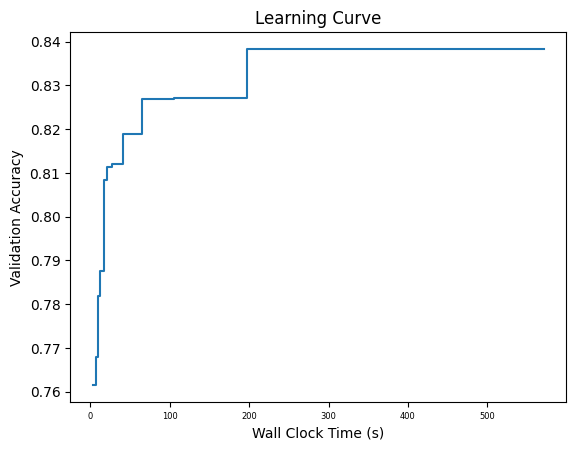

Actual [TEST]:
11798 (80.8%)
Predicted [TEST]:
12723 (87.2%)

y_pred_proba distribution:
(-0.000995, 0.1]     202
(0.1, 0.2]           106
(0.2, 0.3]           237
(0.3, 0.4]           409
(0.4, 0.5]           549
(0.5, 0.6]           756
(0.6, 0.7]          1023
(0.7, 0.8]          1557
(0.8, 0.9]          2546
(0.9, 1.0]          7211
Name: count, dtype: int64

Best validation loss: 0.16167974498187482


              precision    recall  f1-score   support

           0       0.62      0.41      0.49      2798
           1       0.87      0.94      0.90     11798

    accuracy                           0.84     14596
   macro avg       0.74      0.68      0.70     14596
weighted avg       0.82      0.84      0.82     14596

Confusion matrix:
[[ 1153  1645]
 [  720 11078]]


Normalized confusion matrix:

By true:
[[0.41208006 0.58791994]
 [0.06102729 0.93897271]]


By pred:
[[0.61558996 0.12929341]
 [0.38441004 0.87070659]]


By all:
[[0.07899424 0.11270211]
 [0.04932858 0.75897506]]

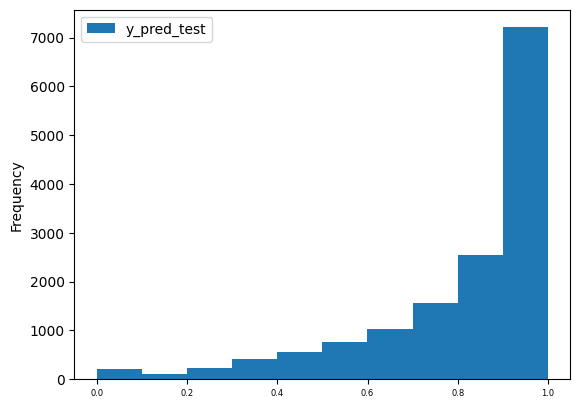

In [59]:
y_pred_proba, y_pred, extra = refusal_model.fit(*r, 
                                                time_budget=600, 
                                                threshold=0.55)

In [60]:
refusal_model.feat_imp()

,variable,imp
5,count_nsf_90_days,0.110160
4,count_nsf_30_days,0.059344
10,sum_employer_income_2_months_ago,0.054609
6,count_stop_payment_90_days,0.047966
12,sum_employer_income_previous_month,0.044818
0,account_age_days,0.042228
8,recurring_deposits_current_month,0.041195
30,sum_total_income_previous_month,0.040591
11,sum_employer_income_current_month,0.036225
25,sum_micro_loan_payments_2_months_ago,0.034501


In [52]:
y_pred_proba_test = refusal_model.predict_proba(X_test, filter=False, engineer=False)

<Axes: ylabel='Frequency'>

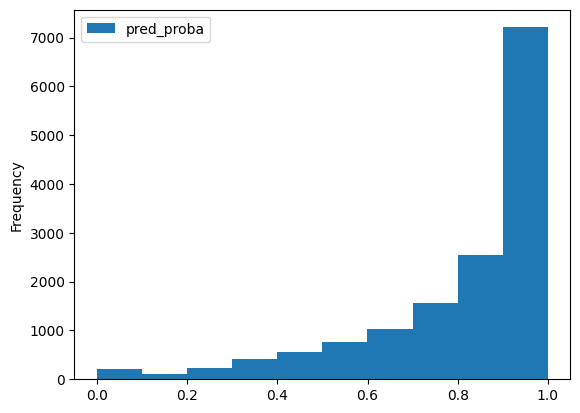

In [53]:
y_pred_proba_test.plot.hist()

In [54]:
perf_df = pd.DataFrame({'y_pred': y_pred_proba, 'y_test': y_test})

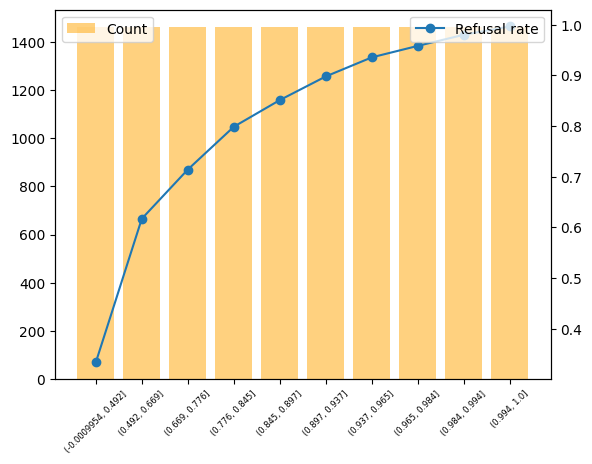

In [55]:
fig = combo_chart(perf_df, xvar='y_pred', q=10, yvar='y_test', ylabel='Refusal rate')

In [61]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

In [62]:
refusal_model.automl.retrain_from_log(
    'log_refusal_0.3.log',
    X_full,
    y_full,
    train_best=True,
    train_full=True,
    time_budget=60
)

[flaml.automl.logger: 05-27 06:33:43] {804} INFO - log file name log_refusal_0.3.log
[flaml.automl.logger: 05-27 06:33:43] {857} INFO - estimator = xgboost, config = {'n_estimators': 43, 'max_leaves': 25, 'min_child_weight': 12.49957082554637, 'learning_rate': 0.6413547778096401, 'subsample': 1.0, 'colsample_bylevel': 0.9528676738644739, 'colsample_bytree': 0.6980216487058154, 'reg_alpha': 0.015338994407265423, 'reg_lambda': 0.6187883856240529}, #training instances = 97327
[flaml.automl.logger: 05-27 06:33:44] {890} INFO - retrain from log succeeded


45.589619636535645

In [63]:
refusal_model.save()

In [64]:
X_full.head()

,account_age_days,average_monthly_recurring_transfers_in_complex,average_monthly_recurring_transfers_out_complex,count_active_days,count_nsf_30_days,count_nsf_90_days,count_stop_payment_90_days,recurring_deposits_2_months_ago,recurring_deposits_current_month,recurring_deposits_previous_month,...,sum_loan_payments_2_months_ago,sum_loan_payments_current_month,sum_loan_payments_previous_month,sum_micro_loan_payments_2_months_ago,sum_micro_loan_payments_current_month,sum_micro_loan_payments_previous_month,sum_total_income_2_months_ago,sum_total_income_current_month,sum_total_income_previous_month,age
0,198.0,0.0,150.0,107.0,3.0,3.0,0.0,0.0,0.0,0.0,...,1267.64,1657.49,1941.24,1162.3,1416.81,1835.90,2150.41,2553.79,2684.21,34.0
1,88.0,0.0,0.0,57.0,0.0,0.0,2.0,0.0,0.0,0.0,...,135.00,191.97,172.98,0.0,0.00,0.00,8476.36,5117.08,4077.11,49.0
2,90.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,3601.78,0.00,2990.71,30.0
3,91.0,0.0,1050.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,...,394.76,95.70,382.05,222.6,95.70,166.94,1979.26,412.00,1894.16,49.0
4,365.0,0.0,0.0,200.0,2.0,2.0,0.0,0.0,0.0,0.0,...,75.50,18.99,268.33,0.0,0.00,173.84,666.00,0.00,0.00,28.0


In [65]:
y_pred_proba = refusal_model.predict_proba(X_full, filter=False, engineer=False)['pred_proba']

<Axes: ylabel='Frequency'>

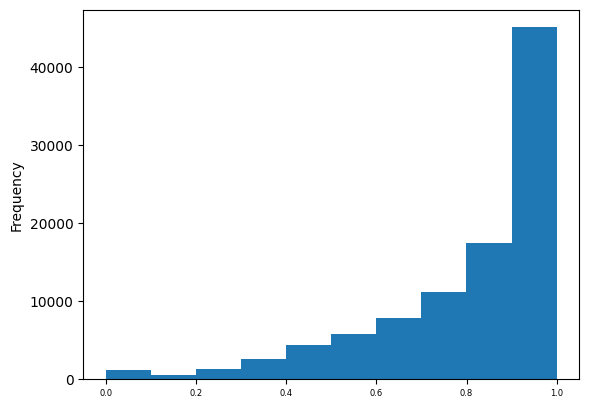

In [66]:
y_pred_proba.plot.hist()

In [67]:
y_pred_proba_bins = pd.cut(y_pred_proba, 10, duplicates = 'drop')
print('\ny_pred_proba distribution:')
print(y_pred_proba_bins.value_counts())


y_pred_proba distribution:
pred_proba
(0.9, 1.0]          45102
(0.8, 0.9]          17466
(0.7, 0.8]          11205
(0.6, 0.7]           7846
(0.5, 0.6]           5786
(0.4, 0.5]           4338
(0.3, 0.4]           2564
(0.2, 0.3]           1290
(-0.000998, 0.1]     1245
(0.1, 0.2]            485
Name: count, dtype: int64


In [68]:
percentiles = np.percentile(y_pred_proba, range(5,100,5))
percentiles

array([0.37701078, 0.49571544, 0.58349861, 0.65219302, 0.70826584,
       0.75511549, 0.79431935, 0.82892301, 0.85728685, 0.88249481,
       0.90526485, 0.92521245, 0.94311357, 0.95798733, 0.9703573 ,
       0.97951324, 0.98674767, 0.99192162, 0.99531112])

In [69]:
refusal_model.percentiles = {p:v for p,v in zip(range(5,100,5), percentiles)}
refusal_model.percentiles 

{5: 0.3770107805728912,
 10: 0.4957154393196106,
 15: 0.5834986090660095,
 20: 0.652193021774292,
 25: 0.7082658410072327,
 30: 0.7551154851913452,
 35: 0.7943193495273589,
 40: 0.8289230108261109,
 45: 0.8572868466377258,
 50: 0.8824948072433472,
 55: 0.9052648544311523,
 60: 0.9252124547958374,
 65: 0.9431135654449463,
 70: 0.9579873323440552,
 75: 0.9703572988510132,
 80: 0.9795132398605346,
 85: 0.9867476701736451,
 90: 0.991921615600586,
 95: 0.9953111231327056}

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.where(y_pred_proba >= refusal_model.percentiles[15], 1, 0)

print(classification_report(y_full, y_pred))

print(y_pred.sum() / len(y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56     18810
           1       0.89      0.93      0.91     78517

    accuracy                           0.85     97327
   macro avg       0.76      0.71      0.73     97327
weighted avg       0.84      0.85      0.84     97327

0.8500005137320579


In [70]:
refusal_model.save()

### Predictions review

In [256]:
refusal_model.predict_proba(X_train, filter=False, engineer=False)['pred_proba']

AttributeError: 'NoneType' object has no attribute 'predict_proba'

refusal_model.predict_proba(X_train, filter=False, engineer=False)['pred_proba']